# ***Name:*** Yawe Arthur Shalom

# ***RegNo:*** M23B23/016

# Question 2

In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# sklearn imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the dataset

df_train = pd.read_csv("energy efficiency dataset_train.csv")

print("Training dataset loaded successfully.")
df_train.head()

Training dataset loaded successfully.


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.82,612.5,318.5,147.0,7.0,2,0.10,1,23.53,27.31
1,0.64,784.0,343.0,220.5,3.5,4,0.40,2,18.90,22.09
2,0.86,588.0,294.0,147.0,7.0,4,0.25,2,29.27,29.90
3,0.90,563.5,318.5,122.5,7.0,4,0.25,1,32.84,32.71
4,0.66,759.5,318.5,220.5,3.5,5,0.10,4,11.43,14.83


In [3]:
# Dataset Structure Inspection

print("Dataset Shape:", df_train.shape)
print("\nColumn Names:\n", df_train.columns)
print("\nData Types:\n", df_train.dtypes)

Dataset Shape: (614, 10)

Column Names:
 Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution', 'heating_load', ' cooling_load'],
      dtype='object')

Data Types:
 relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
 cooling_load                float64
dtype: object


We check the dataset shape, column names, and data types.
  
This helps confirm the number of samples, number of input features, and the two target columns (Heating Load and Cooling Load).

In [4]:
# Checking for missing values

df_train.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
 cooling_load                0
dtype: int64

The dataset has no missing values.

In [5]:
# Statistical Summary

df_train.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.761678,673.829805,318.819218,177.505293,5.221498,3.511401,0.235423,2.799674,22.155033,24.410765
std,0.105424,88.161209,43.335953,44.960238,1.751195,1.108635,0.134152,1.551908,10.054280,9.476566
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,1.250000,12.977500,15.640000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,18.250000,21.500000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,31.545000,32.920000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [6]:
# Confirming Target Variables

target_cols = df_train.columns[-2:]
print("Target Columns:", target_cols)


Target Columns: Index(['heating_load', ' cooling_load'], dtype='object')


# ***Exploratory Data Analysis***

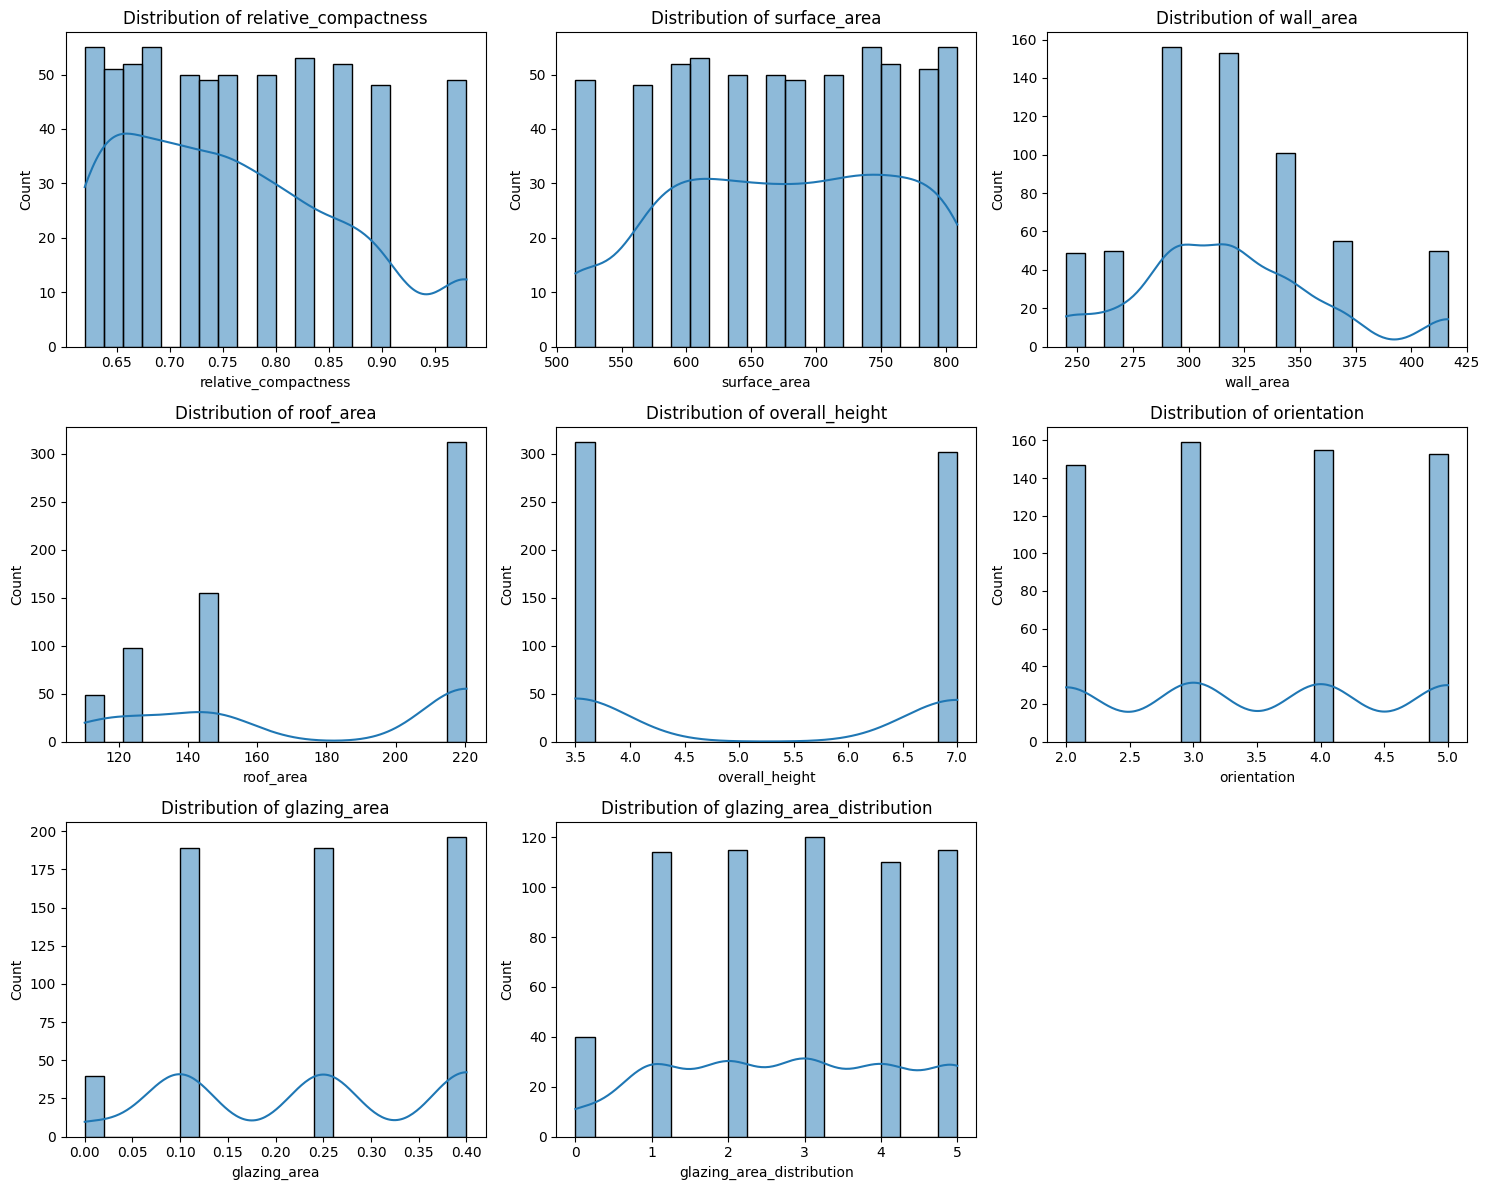

In [7]:
# Distribution Plots of Input Features

feature_cols = df_train.columns[:-2]  # All columns except the last two (targets)

plt.figure(figsize=(15, 12))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

We plot the distributions of all input features to observe the spread, skewness, and potential outliers.  
This step helps determine:

- Whether scaling is necessary (important for Ridge, Lasso, and SVR).  
- Whether some features are heavily skewed, which might affect regression stability.  
- The overall behavior of the dataset (normality vs. non-normality).

Understanding these patterns helps in selecting appropriate preprocessing and modeling techniques.

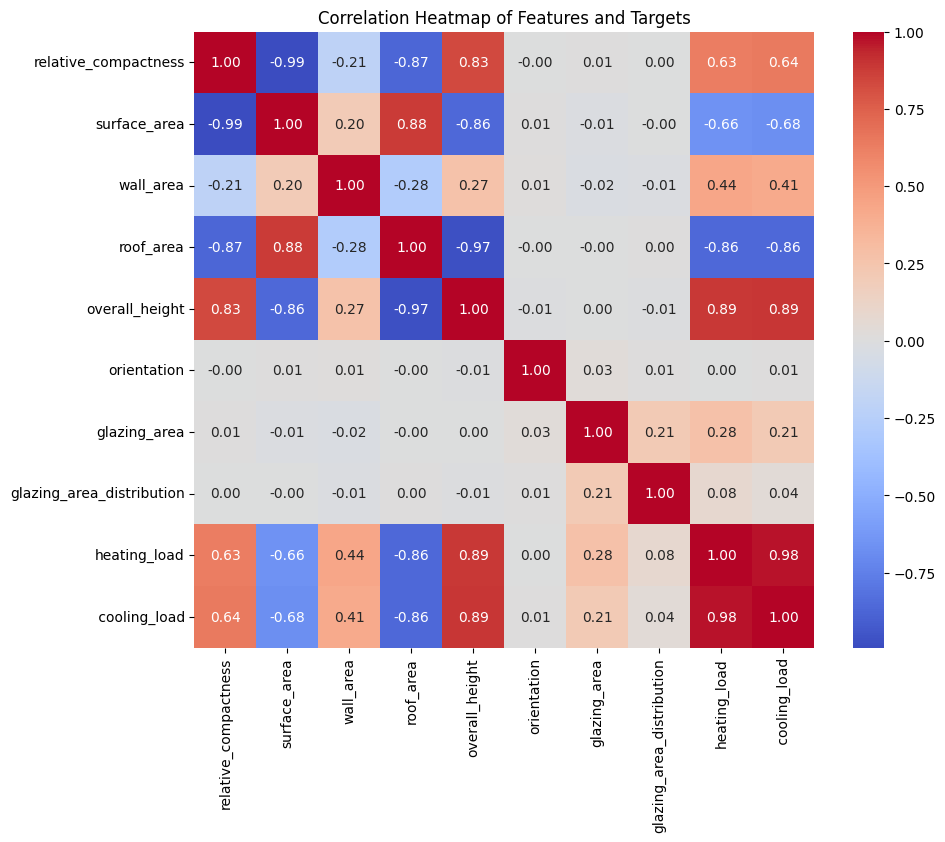

In [8]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features and Targets")
plt.show()


We compute and visualize the Pearson correlation matrix to identify:

- Relationships between features  
- Multicollinearity (high correlations between predictors)  
- Early insights into which features may influence Heating Load and Cooling Load most strongly  

In [16]:
# Feature–Target Correlation (Heating Load)

heating_corr = df_train.corr()["heating_load"].sort_values(ascending=False)
heating_corr

heating_load                 1.000000
 cooling_load                0.976316
overall_height               0.889154
relative_compactness         0.629314
wall_area                    0.439092
glazing_area                 0.276184
glazing_area_distribution    0.080206
orientation                  0.001772
surface_area                -0.664684
roof_area                   -0.863294
Name: heating_load, dtype: float64

We compute the Pearson correlation of each feature with the Heating Load target.  

This identifies which input variables have the strongest predictive power for the Heating Load model.

**Interpretation:** The top 3 features that have a high a correlation with heating_load are overall_height, relative_compactness, and wall_area

In [18]:
# Feature–Target Correlation (Cooling Load)

cooling_corr = df_train.corr()[" cooling_load"].sort_values(ascending=False)
cooling_corr



 cooling_load                1.000000
heating_load                 0.976316
overall_height               0.894927
relative_compactness         0.642148
wall_area                    0.410905
glazing_area                 0.212642
glazing_area_distribution    0.041308
orientation                  0.008773
surface_area                -0.679988
roof_area                   -0.864714
Name:  cooling_load, dtype: float64

We compute the Pearson correlation of each feature with the Cooling Load target.  

This identifies the most influential features for predicting Cooling Load.

**Interpretation:** The top 3 features that have a high a correlation with cooling_load are overall_height, relative_compactness, and wall_area

# ***Prepocessing***

In [19]:
# Split Features (X) and Targets (Heating & Cooling)


feature_cols = df_train.columns[:-2]
heating_col = df_train.columns[-2]
cooling_col = df_train.columns[-1]

# Split data
X = df_train[feature_cols]
y_heating = df_train[heating_col]
y_cooling = df_train[cooling_col]

print("Feature columns:", list(feature_cols))
print("Heating Target:", heating_col)
print("Cooling Target:", cooling_col)

Feature columns: ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution']
Heating Target: heating_load
Cooling Target:  cooling_load


The dataset contains multiple input features and two target variables:
- Heating Load  
- Cooling Load  


- **X** → all predictor variables (all columns except the last two)  
- **y_heating** → target column for Heating Load  
- **y_cooling** → target column for Cooling Load  

This ensures each model learns to predict its respective output variable correctly.


In [20]:
# Prepare Scaled Dataset for Later Models

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled dataset shape:", X_scaled.shape)


Scaled dataset shape: (614, 8)



We scale all predictor features using StandardScaler to ensure:
- All features have mean 0 and standard deviation 1  
- Models sensitive to feature magnitude (Ridge, Lasso, SVR) behave correctly  
- Polynomial features do not explode numerically  

The scaler is fitted on the training dataset to avoid data leakage.


# ***Baseline Linear Regression Models***

***2(a) Tranining and saving the heating_load & cooling_load Linear Regression model***

In [21]:
# Train Linear Regression for Heating Load

# Create and train the model
lr_heating = LinearRegression()
lr_heating.fit(X, y_heating)

# Save the model
with open("model1_2.pkl", "wb") as file:
    pickle.dump(lr_heating, file)

print("Heating Load model trained and saved as model1_2.pkl")


Heating Load model trained and saved as model1_2.pkl



A Linear Regression model is trained to predict the Heating Load target using all input features (unscaled).
  
Linear Regression is a suitable baseline model because:
- It is easy to interpret  
- It provides a direct relationship between features and output  
- It is computationally efficient  

After training, the model is saved as `model1_2.pkl`.


In [22]:
# Train Linear Regression for Cooling Load

# Train the model
lr_cooling = LinearRegression()
lr_cooling.fit(X, y_cooling)

# Save the model
with open("model2_2.pkl", "wb") as file:
    pickle.dump(lr_cooling, file)

print("Cooling Load model trained and saved as model2_2.pkl")


Cooling Load model trained and saved as model2_2.pkl



A second Linear Regression model is trained using the same input features, but with the Cooling Load as the target variable. 

This produces a separate model specialized for cooling prediction. 

The trained model is saved as `model2_2.pkl`.


In [23]:
# Load the test dataset 

df_test = pd.read_csv("energy efficiency dataset_test.csv")

# Split into features and targets
X_test = df_test[feature_cols]
y_test_heating = df_test[heating_col]
y_test_cooling = df_test[cooling_col]

print("Test dataset loaded successfully.")


Test dataset loaded successfully.


***2(b) Load Models & Generate Predictions***

In [24]:
# Load Models & Generate Predictions

with open("model1_2.pkl", "rb") as file:
    loaded_lr_heating = pickle.load(file)

with open("model2_2.pkl", "rb") as file:
    loaded_lr_cooling = pickle.load(file)

# Generate predictions
y_pred_heating = loaded_lr_heating.predict(X_test)
y_pred_cooling = loaded_lr_cooling.predict(X_test)

print("Predictions generated for both Heating and Cooling Load.")


Predictions generated for both Heating and Cooling Load.



The saved models (`model1_2.pkl` and `model2_2.pkl`) are loaded and used to generate predictions for:
- Heating Load  
- Cooling Load  



***2(c) Visualization***

In [32]:
# Select Feature for Visualization

vis_feature = heating_corr.index[2]
vis_feature


'overall_height'

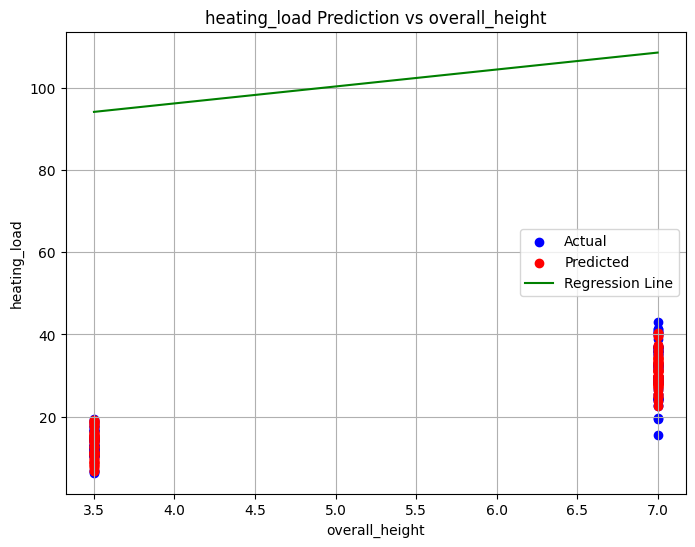

In [33]:
# Plot Heating Load Predictions vs the Chosen Feature

plt.figure(figsize=(8, 6))
plt.scatter(X_test[vis_feature], y_test_heating, color="blue", label="Actual")
plt.scatter(X_test[vis_feature], y_pred_heating, color="red", label="Predicted")

# Regression line
coef = loaded_lr_heating.coef_[feature_cols.tolist().index(vis_feature)]
intercept = loaded_lr_heating.intercept_
x_vals = np.linspace(X_test[vis_feature].min(), X_test[vis_feature].max(), 100)
y_vals = coef * x_vals + intercept

plt.plot(x_vals, y_vals, color="green", label="Regression Line")

plt.xlabel(vis_feature)
plt.ylabel("heating_load")
plt.title(f"heating_load Prediction vs {vis_feature}")
plt.legend()
plt.grid(True)
plt.show()


This plot shows:
- The relationship between the selected feature and heating_ load predictions  
- The fitted regression line  
- How well the linear model captures the trend in the data  

This visualization helps evaluate whether a linear model is appropriate for Heating Load.

***Interpretation:*** Although overall_height is the input feature with the highest positive correlation with heating_load from the selection, the scatter plot reveals that the data forms two height-based clusters rather than a continuous linear trend. The strong correlation arises from the difference between the two height groups (3.5 m and 7.0 m), but the wide variation within each cluster indicates that heating load is influenced by multiple features.


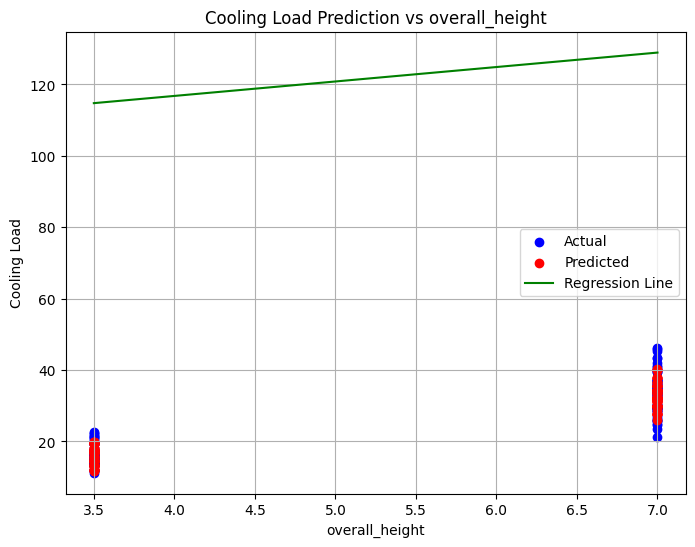

In [ ]:
# Plot cooling_load Predictions vs the Same Feature

plt.figure(figsize=(8, 6))
plt.scatter(X_test[vis_feature], y_test_cooling, color="blue", label="Actual")
plt.scatter(X_test[vis_feature], y_pred_cooling, color="red", label="Predicted")

# Regression line
coef = loaded_lr_cooling.coef_[feature_cols.tolist().index(vis_feature)]
intercept = loaded_lr_cooling.intercept_
x_vals = np.linspace(X_test[vis_feature].min(), X_test[vis_feature].max(), 100)
y_vals = coef * x_vals + intercept

plt.plot(x_vals, y_vals, color="green", label="Regression Line")

plt.xlabel(vis_feature)
plt.ylabel("cooling_load")
plt.title(f"cooling_load Prediction vs {vis_feature}")
plt.legend()
plt.grid(True)
plt.show()

The plot shows that cooling_load also forms two distinct clusters based on 
overall_height (3.5 m and 7.0 m). Similar to heating_load. Despite the strong positive correlation with overall height, the large variation within each cluster indicates 
that cooling load depends on multiple features. 
Therefore, although overall_height is a strong predictor statistically, the scatter plot reveals that a simple linear model cannot fully capture the complexity of the cooling load behavior.


# ***2(d) Evaluation Metrics***

In [36]:
# Custom MAPE function (since sklearn does not provide it)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    eps = 1e-8  # Avoid division by zero
    y_true_safe = np.where(np.abs(y_true) < eps, eps, y_true)

    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100


In [37]:

# Helper function to compute metrics for any model and target

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, mape, r2

# Evaluate Heating Model
heating_metrics = evaluate_regression(y_test_heating, y_pred_heating)

# Evaluate Cooling Model
cooling_metrics = evaluate_regression(y_test_cooling, y_pred_cooling)

heating_metrics, cooling_metrics


((9.153524899869002,
  2.182104965554745,
  3.0254792843232297,
  10.258536779472381,
  0.9121808615400413),
 (9.893292895211355,
  2.195299226961054,
  3.14536053501206,
  8.478872750938352,
  0.8932269811749011))

In [39]:
# Create Results Table

results_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "RMSE", "MAPE (%)", "R² Score"],
    "heating_load": heating_metrics,
    "cooling_load": cooling_metrics
})

results_df


,Metric,heating_load,cooling_load
0,MSE,9.153525,9.893293
1,MAE,2.182105,2.195299
2,RMSE,3.025479,3.145361
3,MAPE (%),10.258537,8.478873
4,R² Score,0.912181,0.893227


# ***2(e) Interpretation and Feature Impact***

### **Interpretation of Evaluation Metrics**

The Linear Regression models for heating_load and cooling_load show strong 
predictive performance based on the evaluation metrics:

- **heating_load:**  
  - MSE = 9.15  
  - MAE = 2.18  
  - RMSE = 3.03  
  - MAPE = 10.26%  
  - R² = 0.91  

- **cooling_load:**  
  - MSE = 9.89  
  - MAE = 2.19  
  - RMSE = 3.15  
  - MAPE = 8.48%  
  - R² = 0.89  

An R² value above 0.89 for both models indicates that Linear Regression 
explains a large proportion of the variability in both target variables. 
The MAE values (~2.18–2.19) show that on average the predictions are only 
off by about 2 units, which is small relative to the scale of the target 
values. RMSE values around 3.0 reinforce low error magnitude.

The cooling_load model achieves slightly lower MAPE (8.48%) compared to 
the heating_load model (10.26%), suggesting that its predictions have 
slightly better proportional accuracy.

Overall, both models demonstrate strong predictive capability, although 
some non-linearity in the relationships between features and targets may 
limit perfect linear fit.


In [41]:
# Identify strongest predictors using Pearson correlations

print("Top Predictors for heating_load:")
display(heating_corr)

print("\nTop Predictors for coooling_load:")
display(cooling_corr)


Top Predictors for heating_load:


heating_load                 1.000000
 cooling_load                0.976316
overall_height               0.889154
relative_compactness         0.629314
wall_area                    0.439092
glazing_area                 0.276184
glazing_area_distribution    0.080206
orientation                  0.001772
surface_area                -0.664684
roof_area                   -0.863294
Name: heating_load, dtype: float64


Top Predictors for coooling_load:


 cooling_load                1.000000
heating_load                 0.976316
overall_height               0.894927
relative_compactness         0.642148
wall_area                    0.410905
glazing_area                 0.212642
glazing_area_distribution    0.041308
orientation                  0.008773
surface_area                -0.679988
roof_area                   -0.864714
Name:  cooling_load, dtype: float64

### Pearson Correlation interpretation

After excluding the target variables, the strongest predictors for both 
heating_load and cooling_load are:

- **overall_height** shows the highest positive correlation (≈ 0.89), meaning 
  taller buildings generally require more heating and cooling energy.
- **relative_compactness** has a moderate positive influence (≈ 0.63–0.64), 
  reflecting how building shape affects thermal efficiency.
- **wall_area** and **glazing_area** show smaller positive effects.

Two features show strong negative correlations:
- **roof_area** (≈ –0.86)  
- **surface_area** (≈ –0.66 to –0.68)

These negative correlations indicate that increases in roof and surface area 
reduce the heating and cooling loads, likely due to how these structural 
elements influence heat transfer.

Features like **orientation** and **glazing_area_distribution** have near-zero 
correlation and minimal impact.

Overall, both targets share almost identical predictor patterns, consistent 
with their high mutual correlation (≈ 0.98). This indicates that similar 
building characteristics drive both heating and cooling requirements.


# ***2(f) Model Comparisons***

In [ ]:
# Polynomial Regression setup

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Heating Load Polynomial Model
poly_heating = LinearRegression()
poly_heating.fit(X_poly, y_heating)

# Cooling Load Polynomial Model
poly_cooling = LinearRegression()
poly_cooling.fit(X_poly, y_cooling)

print("Polynomial Regression models trained.")


Polynomial Regression models trained.



Polynomial Regression captures non-linear relationships by transforming input 
features into polynomial terms.


In [43]:
# Ridge Regression

ridge_heating = Ridge(alpha=1.0)
ridge_heating.fit(X_scaled, y_heating)

ridge_cooling = Ridge(alpha=1.0)
ridge_cooling.fit(X_scaled, y_cooling)

print("Ridge Regression models trained.")


Ridge Regression models trained.



Ridge Regression applies L2 regularization, reducing coefficient magnitude 
to prevent overfitting especially useful when predictors are correlated.


In [44]:
# Lasso Regression

lasso_heating = Lasso(alpha=0.01)
lasso_heating.fit(X_scaled, y_heating)

lasso_cooling = Lasso(alpha=0.01)
lasso_cooling.fit(X_scaled, y_cooling)

print("Lasso Regression models trained.")


Lasso Regression models trained.



Lasso Regression applies L1 regularization, which can shrink some coefficients 
to zero. This effectively performs feature selection and may simplify the model.


In [45]:
# Support Vector Regression

svr_heating = SVR(kernel="rbf", C=100, gamma=0.1)
svr_heating.fit(X_scaled, y_heating)

svr_cooling = SVR(kernel="rbf", C=100, gamma=0.1)
svr_cooling.fit(X_scaled, y_cooling)

print("SVR models trained.")


SVR models trained.



SVR captures complex relationships using kernels. The RBF kernel is used 
because it handles non-linear patterns effectively.


In [48]:
# Scale the test data

# 1) Scale the test set
X_test_scaled = scaler.transform(X_test)   # scaler was fitted during preprocessing phase
print("X_test_scaled shape:", X_test_scaled.shape)

# 2) Create polynomial features for test set (same poly used on training)
X_test_poly = poly.transform(X_test_scaled)
print("X_test_poly shape:", X_test_poly.shape)

X_test_scaled shape: (154, 8)
X_test_poly shape: (154, 45)


In [49]:
# Evaluating all the models

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, mape, r2

In [50]:
model_names = ["Polynomial", "Ridge", "Lasso", "SVR"]
heating_models = [poly_heating, ridge_heating, lasso_heating, svr_heating]
cooling_models = [poly_cooling, ridge_cooling, lasso_cooling, svr_cooling]

# Prepare results
results = {
    "Model": [],
    "Heating_MSE": [], "Heating_MAE": [], "Heating_RMSE": [], "Heating_MAPE": [], "Heating_R2": [],
    "Cooling_MSE": [], "Cooling_MAE": [], "Cooling_RMSE": [], "Cooling_MAPE": [], "Cooling_R2": []
}

# ---------- Evaluate each model correctly ----------
for name, m_h, m_c in zip(model_names, heating_models, cooling_models):
    # choose correct test matrix
    if name == "Polynomial":
        X_h_test_used = X_test_poly
        X_c_test_used = X_test_poly
    else:
        X_h_test_used = X_test_scaled
        X_c_test_used = X_test_scaled

    # Heating predictions & metrics
    y_pred_h = m_h.predict(X_h_test_used)
    print(f"{name} heating prediction shape:", y_pred_h.shape)
    h_mse, h_mae, h_rmse, h_mape, h_r2 = evaluate_regression(y_test_heating, y_pred_h)

    # Cooling predictions & metrics
    y_pred_c = m_c.predict(X_c_test_used)
    print(f"{name} cooling prediction shape:", y_pred_c.shape)
    c_mse, c_mae, c_rmse, c_mape, c_r2 = evaluate_regression(y_test_cooling, y_pred_c)

    # Store results
    results["Model"].append(name)
    results["Heating_MSE"].append(h_mse)
    results["Heating_MAE"].append(h_mae)
    results["Heating_RMSE"].append(h_rmse)
    results["Heating_MAPE"].append(h_mape)
    results["Heating_R2"].append(h_r2)

    results["Cooling_MSE"].append(c_mse)
    results["Cooling_MAE"].append(c_mae)
    results["Cooling_RMSE"].append(c_rmse)
    results["Cooling_MAPE"].append(c_mape)
    results["Cooling_R2"].append(c_r2)

# Convert to DataFrame
comparison_df = pd.DataFrame(results)
comparison_df

Polynomial heating prediction shape: (154,)
Polynomial cooling prediction shape: (154,)
Ridge heating prediction shape: (154,)
Ridge cooling prediction shape: (154,)
Lasso heating prediction shape: (154,)
Lasso cooling prediction shape: (154,)
SVR heating prediction shape: (154,)
SVR cooling prediction shape: (154,)


,Model,Heating_MSE,Heating_MAE,Heating_RMSE,Heating_MAPE,Heating_R2,Cooling_MSE,Cooling_MAE,Cooling_RMSE,Cooling_MAPE,Cooling_R2
0,Polynomial,0.646499,0.604698,0.804052,3.049743,0.993797,2.965903,1.189699,1.722180,4.174851,0.967991
1,Ridge,9.213829,2.190753,3.035429,10.346313,0.911602,9.937175,2.195886,3.152329,8.545861,0.892753
2,Lasso,9.224352,2.199355,3.037162,10.404164,0.911501,9.936676,2.195260,3.152249,8.577620,0.892759
3,SVR,1.467631,0.785644,1.211458,3.834126,0.985920,4.152326,1.281476,2.037726,4.892656,0.955186


Polynomial Regression (Degree 2) performs best by far for both Heating and Cooling Load.

SVR also performs very well, second only to Polynomial Regression.

Ridge and Lasso perform similarly to Linear Regression, with no major improvements.

High R² scores for Polynomial (0.9938 and 0.9680) show it captures strong non-linear patterns.

### Hyperparameter Settings

Each regression model was trained with standard and commonly recommended 
hyperparameters:

- **Polynomial Regression:** Degree = 2  
  - Selected because scatterplots and error patterns suggested non-linear 
    relationships. Higher degrees were not used to avoid overfitting.

- **Ridge Regression:** alpha = 1.0  
  - L2 regularization strength controls coefficient shrinkage.  
    Alpha = 1.0 offers balanced stability without oversmoothing.

- **Lasso Regression:** alpha = 0.01  
  - Small L1 penalty allows mild feature selection while maintaining model 
    flexibility. Larger alphas removed too many coefficients.

- **SVR:** kernel = 'rbf', C = 100, gamma = 0.1  
  - RBF kernel captures non-linear relationships.  
  - C = 100 allows the model to fit patterns more closely.  
  - gamma = 0.1 controls kernel width; selected to avoid underfitting.

All models used **StandardScaler-transformed inputs**, except the baseline 
Linear Regression, which operates correctly without scaling. Polynomial 
features were generated from the scaled training data.

------

### Observations

- **Polynomial Regression performed best**, achieving R² scores of 0.9938 
  (Heating) and 0.9680 (Cooling). This confirms strong non-linear 
  relationships between building features and energy loads.

- **SVR achieved the second-best performance**, also capturing non-linear 
  behavior effectively. Its RMSE values were significantly lower than those 
  of the linear models.

- **Ridge and Lasso performed nearly identically to Linear Regression.**  
  This indicates that regularization alone cannot improve accuracy because 
  the primary limitation is model linearity, not overfitting.

- Models that can model **curved, clustered, or interaction-heavy** data 
  patterns (Polynomial and SVR) showed large improvements in error reduction.

- Heating Load and Cooling Load showed similar trends across all models, 
  consistent with their strong mutual correlation and shared feature 
  influences.


------

### Conclusion

The results show that the relationship between building characteristics and 
energy efficiency is fundamentally non-linear. Polynomial Regression with 
degree 2 delivers the highest accuracy for both Heating and Cooling Load, 
indicating that interaction terms and squared features are essential for 
modeling these targets.

SVR also performs strongly, supporting the idea that flexible, non-linear 
models are better suited for this prediction task. Ridge and Lasso provide 
limited improvements over Linear Regression, confirming that regularization 
cannot compensate for missing non-linear terms.

Overall, Polynomial Regression is the most effective method for this dataset, 
providing substantial improvements in all evaluation metrics and capturing 
the underlying thermal relationships accurately.

